In [144]:
#using Adj. matrix
class Graph:
    def __init__(self, vertices=None):
        if vertices is None:
            vertices = []
        
        self.vertices = vertices
        self.adj_matrix = [[0] * len(vertices) for _ in range(len(vertices))]   
    
    def add_edge(self, vertex1,vertex2):   
        
        if vertex1 in self.vertices and vertex2 in self.vertices:               
            index1 = self.vertices.index(vertex1)
            index2 = self.vertices.index(vertex2)

            # for undirected graph
            self.adj_matrix[index1][index2] =1
            self.adj_matrix[index2][index1] =1

            # Increment the count for Psuedograph
            #self.adj_matrix[index1][index2] += 1
            #self.adj_matrix[index2][index1] += 1

    def remove_vertex(self,vertex):
        if vertex in self.vertices:
            idx = self.vertices.index(vertex)
            
            del self.vertices[idx]
            del self.adj_matrix[idx]
            for row in self.adj_matrix:
                del row[idx]

    def remove_edge(self,vertex1, vertex2):
        if vertex1 in self.vertices and vertex2 in self.vertices:    
            index1 = self.vertices.index(vertex1)
            index2 = self.vertices.index(vertex2)
            if self.adj_matrix[index1][index2] > 0:
                self.adj_matrix[index1][index2] -= 1
                self.adj_matrix[index2][index1] -= 1
  
    def print_edges(self):
        for row in self.adj_matrix:
            print(row)
    

if __name__ == "__main__":
    vertices = ['a', 'b', 'c', 'd']
    g = Graph(vertices)
    

    g.add_edge('a', 'b')
    g.add_edge('a', 'd')
    g.add_edge('b', 'c')
    g.add_edge('c', 'd')
    g.remove_vertex('c')
    
    g.print_edges()   


[0, 1, 1]
[1, 0, 0]
[1, 0, 0]


In [145]:
#using adj. list
class Graph:
    def __init__(self):
        self.vertices = {}
        self.edges = []

    def add_vertex(self, vertex):
        if vertex not in self.vertices:
            self.vertices[vertex] = []

    def add_edge(self, vertex1, vertex2):
        if vertex1 in self.vertices and vertex2 in self.vertices:
            self.vertices[vertex1].append(vertex2)
            self.vertices[vertex2].append(vertex1)  
            self.edges.append((vertex1, vertex2))

    def remove_vertex(self, vertex):
        
        if vertex in self.vertices:
            # Remove the vertex and all its incident edges
            del self.vertices[vertex]
            
            for adj_list in self.vertices.values():
                if vertex in adj_list:
                    adj_list.remove(vertex)


    def remove_edge(self, vertex1, vertex2):
        if vertex1 in self.vertices and vertex2 in self.vertices:
            if vertex2 in self.vertices[vertex1]:
                self.vertices[vertex1].remove(vertex2)
            if vertex1 in self.vertices[vertex2]:
                self.vertices[vertex2].remove(vertex1)


    def display(self):
        print("Graph:", self.vertices)
        print("Edges:", self.edges)


# Example Usage:
if __name__ == "__main__":
    g = Graph()
    g.add_vertex('a')
    g.add_vertex('b')
    g.add_vertex('c')
    g.add_vertex('d')

    g.add_edge('a', 'b')
    g.add_edge('a', 'd')
    g.add_edge('b', 'c')
    g.add_edge('d', 'c')
    g.display()

    g.remove_vertex('d')
    g.display()



Graph: {'a': ['b', 'd'], 'b': ['a', 'c'], 'c': ['b', 'd'], 'd': ['a', 'c']}
Edges: [('a', 'b'), ('a', 'd'), ('b', 'c'), ('d', 'c')]
Graph: {'a': ['b'], 'b': ['a', 'c'], 'c': ['b']}
Edges: [('a', 'b'), ('a', 'd'), ('b', 'c'), ('d', 'c')]


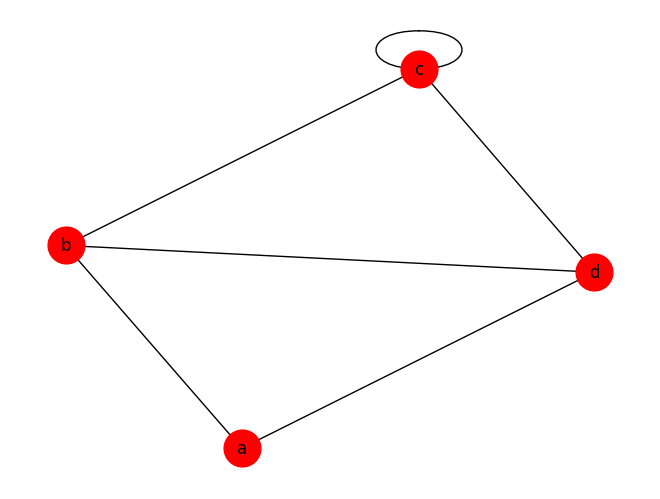

In [146]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')

g.add_edge('a', 'b')
g.add_edge('a', 'd')
g.add_edge('b', 'c')
g.add_edge('b', 'd')
g.add_edge('c', 'c')
g.add_edge('c', 'd')

# Visualize the graph
nx.draw(g, with_labels=True, node_color='red', node_size=700, font_size=12)
plt.show()
